In [126]:
import numpy as np
from numpy.random import normal
from matplotlib import pyplot as plt 
import seaborn as sns

In [127]:
#Size of a matrix
N = 8

#Number of matrices
Nmat = 50000


In [128]:
#Collect eigenvalues from matrices from Gaussian Orthogonal Ensemble

mean=0
stdev=1
eigsGOE = []

for i in range(0,Nmat):
    data = np.random.normal(mean, stdev, (N, N))
    A = np.matrix(data)

    #Symmetrization of the matrix
    Sym_A = (A + A.H)/2

    #Create a vector containing the eigenvalues
    eigsGOE = np.append(eigsGOE, np.linalg.eigvals(Sym_A))

In [129]:
#Collect eigenvalues from matrices from Gaussian Unitary Ensemble

mean=0
stdev=1
eigsGUE = [] 

for i in range(0,Nmat):
    data = np.random.normal(mean, stdev, (N, N)) + 1j * np.random.normal(mean, stdev, (N, N))
    A = np.matrix(data, dtype = complex)

    #Symmetrization of the matrix
    Sym_A = (A + A.H)/2

    #Create a vector containing the eigenvalues
    eigsGUE = np.append(eigsGUE, np.linalg.eigvals(Sym_A))

In [130]:
#Collect eigenvalues from matrices from Gaussian Symplectic Ensemble

mean=0
stdev=1
eigsGSE = [] 

for i in range(0,Nmat):
    data = np.random.normal(mean, stdev, (N, N)) + 1j * np.random.normal(mean, stdev, (N, N))
    A = np.matrix(data, dtype = complex)
    data = np.random.normal(mean, stdev, (N, N)) + 1j * np.random.normal(mean, stdev, (N, N))
    B = np.matrix(data, dtype = complex)
    
    M = np.block([[A,B],[-B.conjugate(),A.conjugate()]])

    #Symmetrization of the matrix
    Sym_M = (M + M.H)/2

    #Create a vector containing the eigenvalues
    eigsGSE = np.append(eigsGSE, np.linalg.eigvals(Sym_M))

C:\Users\peter\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\peter\Anaconda3\lib\site-packages\seaborn\distributions.py:653: ComplexWarning: Casting complex values to real discards the imaginary part
  data = data.astype(np.float64)


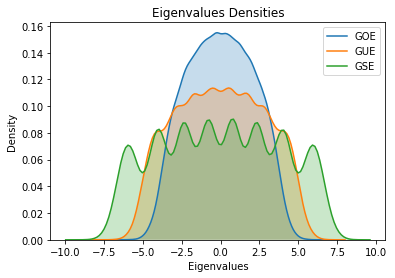

In [131]:
#plt.plot(eigsGOE)
#n, bins, patches = plt.hist(eigsGOE, 10, density=True, facecolor='r', alpha=0.75)
#n, bins, patches = plt.plot(eigsGUE, 10, density=True, facecolor='r', alpha=0.75)
sns.kdeplot(eigsGOE, shade = True, label = 'GOE')
sns.kdeplot(eigsGUE, shade = True, label = 'GUE')
sns.kdeplot(eigsGSE, shade = True, label = 'GSE')

plt.xlabel('Eigenvalues')
plt.ylabel('Density')
plt.title('Eigenvalues Densities')
plt.show()